In [19]:
import os
import pandas as pd
import nltk


In [20]:
df=pd.read_csv('/Users/harshida/Downloads/jokes_2.csv')
data=df.drop(['Question','ID'], axis=1)

In [21]:
data.head(n=10)

,Answer
0,He nearly drown in his own tea pee.
1,Mycheexarphlexin
2,Matt
3,Jean-Luc Pickacard
4,A bullet doesn't miss Harambe
5,He was having a mid-life crisis
6,One shucks between fits...
7,Kevin Durant or Bernie Sanders?
8,Because the shark burped.
9,"A bachelor will go to the fridge, sees nothing..."


In [22]:
for col in data:
    print(col)

Answer


# Data Cleaning

In [23]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords

In [24]:
i=0
for txt in data['Answer']:
     w_list = re.sub(r'[^a-z\s]',' ',txt.lower()).split()    
     w_list=[w for w in w_list if w not in stopwords.words('english')]   
     data.loc[i,'Answer']=' '.join(w_list)
     i+=1

KeyboardInterrupt: 

In [58]:
data.head(5)

,Answer
0,nearly drown tea pee
1,mycheexarphlexin
2,matt
3,jean luc pickacard
4,bullet miss harambe


# TF-IDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [60]:
TfIdf=TfidfVectorizer()
cv=CountVectorizer()
DataTransform=TfIdf.fit_transform(data['Answer'])
DataToArray=DataTransform.toarray()
#DataTransform1=cv.fit_transform(data['Answer'])
#DataToArray1=DataTransform1.toarray()
#DataToArray1
#DataFeatureNames=cv.get_feature_names()
#DataFeatureNames

In [61]:
DataToArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
Feature_names=TfIdf.get_feature_names()
Feature_names

['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhh',
 'aaaaaaaaaaaaaaaaaaaaahhhhh',
 'aaaaaaaaaaaaaaaaaallllllpppp',
 'aaaaaaaaaaaaaaaahhhhhhhhh',
 'aaaaaaaaallah',
 'aaaaaaaah',
 'aaaaaah',
 'aaaaaarrrrrrrrrrrrr',
 'aaaaaayyyyyyyy',
 'aaaaand',
 'aaaaantsss',
 'aaaaarby',
 'aaaaargghh',
 'aaaaayyyyyyy',
 'aaaarrrrrrrr',
 'aaahhh',
 'aaahhhhhh',
 'aaahhhhhhhh',
 'aaannnd',
 'aaargh',
 'aaarrrrrrr',
 'aargh',
 'aaron',
 'aarp',
 'aarrrrrrr',
 'aaryan',
 'abalonely',
 'abandoned',
 'abandonment',
 'abasement',
 'abbey',
 'abbreviations',
 'abby',
 'abcd',
 'abcdefghijk',
 'abcmen',
 'abcs',
 'abduct',
 'abducted',
 'abdul',
 'abdull',
 'abel',
 'abelian',
 'abercrombie',
 'abet',
 'abhor',
 'abiding',
 'ability',
 'able',
 'aboard',
 'abode',
 'abola',
 'abolished',
 'abolokof',
 'abominable',
 'abomination',
 'aboot',
 'abori',
 'aboriginal',
 'abort',
 'aborted',
 'abortion',
 'abortions',
 'abouttit',
 'abra',
 'abra

In [63]:
top = np.array(TfIdf.get_feature_names())
indices=np.argsort(TfIdf.idf_)[::-1]

top_n=50
top[indices][:50]
#print(top_features)


#for i in range(0,32689,1):
  # print(Feature_names[i],DataTransform[i].todense().sum())

array(['zzzzip', 'iliner', 'ima', 'ilyn', 'illustrations', 'illuminice',
       'illuminati', 'illis', 'illinois', 'illi', 'illeagle', 'illac',
       'ilingus', 'ilean', 'imagi', 'iknow', 'ikea', 'ijk',
       'iiiiiiiiiiiiiiiiii', 'iiiii', 'iiii', 'iguanodon', 'iguana',
       'igor', 'ignordacoc', 'ignorant', 'imac', 'imagined',
       'igloominati', 'immobile', 'implication', 'implicating',
       'implementation', 'impissable', 'impeckable', 'impeccable',
       'impeached', 'impawster', 'impaired', 'imo', 'immortal',
       'immiscible', 'imagines', 'immigration', 'immigrated', 'immense',
       'immaculate', 'imhotep', 'imho', 'imgoingtohellforthis'],
      dtype='<U87')

In [64]:
for i in range(0,32689,1):
    print(Feature_names[i],DataTransform[i].todense().sum())

aa 1.9864719163166644
aaa 1.0
aaaa 1.0
aaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhh 1.7309305750890862
aaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhh 1.7307818189323871
aaaaaaaaaaaaaaaaaaaaahhhhh 1.7212514011871
aaaaaaaaaaaaaaaaaallllllpppp 1.6734934920296107
aaaaaaaaaaaaaaaahhhhhhhhh 1.9930617901582393
aaaaaaaaallah 1.4140759452239469
aaaaaaaah 2.83825651921617
aaaaaah 1.98882424569154
aaaaaarrrrrrrrrrrrr 1.0
aaaaaayyyyyyyy 1.3974843335436988
aaaaand 1.4072521618089318
aaaaantsss 1.6734934920296107
aaaaarby 1.4067770590273825
aaaaargghh 1.7085985879867058
aaaaayyyyyyy 1.7225508271344037
aaaarrrrrrrr 2.175567548001096
aaahhh 1.7211865479295942
aaahhhhhh 1.3864153153453644
aaahhhhhhhh 1.987544799648598
aaannnd 1.6922092477090838
aaargh 1.728111670382285
aaarrrrrrr 1.2212598429875852
aargh 1.7279927844483645
aaron 1.4115714724827368
aarp 1.9776788374441978
aarrrrrrr 1.0
aaryan 1.4013033897534486
abalonely 1.668183587408031
abandoned 1.7251590325605721
abandonment 1.962200023283241
abasemen

akbarrrr 1.3996171852136559
akhbarrrr 1.0
akjnveoajknoea 1.7231658531683398
akpos 1.3480108798289354
akward 1.997602197578901
al 1.3747459424557995
ala 2.403686680155487
alabama 1.9675478863980256
alabaman 1.0
alabaster 3.0688415601825767
alada 1.4137702576744289
alady 2.7680549131947476
alam 1.4133489533013457
alamode 1.410497534428735
alan 1.4097057340416472
alane 1.0
alarm 1.0
alarmed 1.0
alarmism 1.4111748630695387
alarms 1.725556071577984
alaska 1.713689855385696
alaskan 0.0
alaydy 1.9419982304534986
albert 1.4026375033706449
albino 2.2498677686568183
albu 1.9795744991756843
album 1.412843629683031
albumen 2.1887520619848804
albums 2.4168144090475794
alcapelca 0.0
alcatraz 1.0
alchemical 2.1400196058587193
alchohol 1.978069553448036
alcmene 1.9918291234489267
alcohol 2.7546646141315625
alcohole 1.3509832180943513
alcoholic 1.0
alcoholics 1.4142135623730951
alderaan 1.413009821051209
aldi 1.0
ale 1.0
alec 2.2057052766728704
alemony 1.4017676639068268
aleppo 1.0
alert 1.730927969584

auschwistic 2.406252870986532
auschwitz 1.9863759697480898
auschwitzim 1.0
aushwitz 2.394220869269675
aussi 1.388277799504793
aussie 3.118083251395885
aussielating 1.4132921930318196
austerity 1.9787402785475579
austin 1.3572034998286306
australia 3.275763221741639
australian 1.9655474765666359
australians 2.6023138265400316
austria 2.2263665653221234
austrian 1.0
austronomers 1.0
authentic 1.9841692590396847
authentication 1.0
author 1.410101114363303
authorities 1.388277799504793
authority 1.9871691216418934
autipsy 2.216472406229706
autism 1.7159931241195039
autistic 2.7534459133202125
autistocrat 1.7131387051696567
auto 1.9918291234489267
autobots 3.422600573823386
autobottomoftheocean 1.4139709645241623
autobus 2.4215373689308604
autochoke 2.6192410506671058
autoerotic 1.0
automatic 1.4141610130477609
automatically 1.7251696499026452
automating 1.4054361162763214
automobile 1.0
autopsy 1.0
autumn 2.459068412530751
auuuurrrrrrrrrr 1.4140411676136493
aux 1.6759569579681561
avagadro 

batman 1.9241699324486499
batmobile 2.5558041710521486
batshit 2.6398799081599558
batter 1.7270808842098408
battered 1.0
batteries 1.3961948426066324
battery 1.6999478664124197
battle 1.6959125352667606
battles 1.0
battleship 1.0
battleshvitz 2.181633543536777
batvirus 2.173574945568019
bay 1.916173063801301
bayball 1.4051769166955532
bayesian 2.777809691526662
baygulls 1.3815182935164367
bayou 1.3926865346817257
bayyyyker 1.4137702576744289
bazaar 1.7181065473206816
bazing 2.4119200326133656
bazinga 1.6629273082683975
bb 3.687161539758596
bbbrraaaaaaahhhhhmmm 1.0
bbc 2.1715006583532825
bbecause 1.6881434416278274
bblamdiffergmunmnumblldpbdb 1.4103119553337446
bbq 2.4188827840264695
bbw 2.5772751737180855
bc 1.0
bcoz 2.2173745394030053
bea 2.631946388369261
beacause 1.7240545848225408
beach 1.0
beaches 2.4236340572546444
beacon 1.930952061229191
beacuse 1.0
beagle 1.6821329919364432
beak 2.216729676514994
beaker 1.0
bealum 1.4021247323468375
beams 0.0
bean 1.4136470091106885
beaner 2.4

booger 1.9858191371755625
boogers 1.0
boogeynan 1.0
boogie 1.719661880358825
boograr 1.0
booings 1.0
book 1.4133828926600396
booked 1.9842103997635903
bookkake 2.5944218299465884
books 1.719353004974605
boolean 1.9891574637319782
boom 1.7301556194590262
boomerang 1.370372810887838
boone 1.0
booo 1.0
booooo 1.0
booooooo 2.437749303521901
boooooooobs 1.9980119067666404
booooooooooooookake 1.7301556194590262
booooooooooooooooooooze 2.205494764233525
boooooooooooooooos 1.7312113663913569
boooooze 2.2285568573918257
booootyfull 1.0
booquet 1.0
boos 1.3883611878918067
boost 1.7032619195842758
boot 1.0
bootes 1.9797612889075342
booth 3.039872916733468
boots 1.6877433233095698
booty 0.0
booze 1.0
boozzzzzzzzzzzz 2.3839165604307846
bop 1.0
bor 1.0
borate 1.3604082956642998
border 1.9686453786535265
bordercross 2.7265982457201017
borderlands 1.9485671721895326
borderline 1.4138978740661334
borders 2.4011740176251313
bore 1.398038611683886
borealis 2.2260187078758307
bored 2.4187699122586412
bori

bullet 2.6044498584627824
bullets 1.0
bullied 2.1436158790067115
bulls 1.7187647636565744
bullschist 0.0
bullshit 1.707070041929148
bully 1.700212587051876
bullying 1.0
bum 1.385216579527941
bumblegum 1.0
bumbs 0.0
bummer 1.4120436206402665
bump 1.4123664433241876
bumped 1.0
bumper 1.4115885579574756
bumpin 1.7193995453228572
bumps 3.8137996654261723
bums 1.7125303046347087
bun 1.4132067882216854
bunch 1.6753064192480929
buncha 1.4123274158812085
bunches 1.0
bundle 1.0
bundt 1.0
bungee 1.414213562373095
bunnies 1.0
bunny 1.7133460723157896
bunnylingus 1.0
buns 1.4142135623730951
bunyan 1.4078265947627442
buock 1.7048687290843594
buoy 1.4043723918400572
buoyant 2.4169816778833106
burden 1.9893177214587916
bureau 1.399706252391081
buren 1.0
burger 1.9898832188225075
burgers 1.0
burgertory 1.7303957060023847
burglar 1.98571073577127
burglars 1.968991398026655
burgundy 1.0
burial 1.694771867176482
buried 3.4569391346670812
burkina 1.40780183060416
burn 1.411282227511398
burned 1.0
burnem 1

catonese 1.4139577146651576
catoons 1.0
cats 1.4139577146651576
catstrated 1.4139577146651576
cattle 1.0
cattlist 1.4106667798250034
cauc 2.3020301475305107
caucasian 1.4127116344960318
caucasians 1.9522368356884523
caught 2.592462289804
cauldron 1.4135457143259302
cauliflower 1.0
caulk 2.227890762611944
causal 1.9635260965482484
cause 1.9627182092061433
caused 1.413720882370034
causes 1.968943762090368
causing 1.394421160151723
caust 2.620988699485274
cauterize 1.3611512647923445
caution 1.3826980614013922
cave 1.6697108043450646
caves 1.0
cavities 1.0
cavity 1.3894203386765924
cavs 1.0
caw 1.0
cawcus 1.7100110862432323
cawk 1.724602670904022
cawphony 2.367394818910316
cc 1.9711793076153081
ccccuuuuunnnnnttttt 2.157564719837106
cctv 3.1182042536775656
cd 2.3692411630395536
cds 1.4115714724827368
ce 3.3979570187516366
cealls 2.2243841085633314
ceasarion 1.3866693833734764
ceasars 1.7199731620445253
ceasefire 2.2174099791881385
ceaser 2.1693473569239377
ceeee 1.4142135623730951
ceiling 

coach 1.4121100093417098
coached 2.733244736232435
coaching 1.7290010204673123
coal 1.0
coast 2.4326513048706055
coaster 1.7193814278027557
coat 1.4134456821253898
coathanger 1.9705044792140547
coats 1.3902920778641477
coaxing 1.0
cobain 1.0
cobainer 1.0
cobang 1.0
cobbler 2.1824018458995758
cobra 1.4043723918400572
cocaine 1.408996114995547
cociane 2.2195233421709784
cock 2.379411306391954
cockadial 4.7320586597024
cockadockapoo 1.7161025727677415
cockadoodledooo 1.4134138503831735
cockamamie 0.0
cockasian 1.0
cockatoo 1.4140036423560431
cocked 1.0
cocker 1.9916323404691445
cockerel 1.9809851669607215
cockeyed 1.356355938269846
cockfight 1.4125319075597567
cockle 1.7218162409291207
cockophony 1.9736902543255954
cockortwo 1.412843629683031
cockpit 1.4111191100622213
cockpits 1.4142135623730951
cockroach 1.9894932789677686
cockroaches 1.9418417072938576
cocks 1.0
cocksucker 1.0
cocktail 1.0
cocktails 4.4344499342836015
cocktopus 2.184931084194421
cockworker 1.7302202828185722
cocky 1.64

critical 1.0
critically 1.0
criticism 1.0
critics 1.0
croak 1.726114986442612
croakaine 1.3927044968911937
croaks 1.0
croatia 1.0
croatian 1.694029817152534
croc 1.41304157864618
crocasian 3.0967445543942804
crock 1.94818717859702
croco 1.7099886637664283
crocodile 1.711658379621117
crocodiles 1.7168660173724692
crocs 2.0548964753790036
croissant 2.591761036229153
cronflakes 1.402826437120336
crony 1.4123164743023222
crook 1.4073094136394841
crooked 1.7218783850647918
crooney 1.0
cross 1.0
crossdresser 2.9727570577489955
crossed 1.4140681406705085
crosser 1.6021810363661915
crosses 1.4134456821253898
crossfire 1.9708594658824934
crossfit 2.084800318870151
crossing 1.9647169074518565
crossover 1.9770820999799155
crosswalks 1.9783152152841423
crossword 1.4139577146651576
crotch 1.3917437708881217
crotches 1.4123274158812085
crouched 2.625059643675664
crouching 2.3270551340331496
crountry 1.0
crow 1.7119939515953644
crowbar 1.0
crowd 2.7706836169315285
crowds 1.4133388751123037
crowe 1.71

described 3.817058126176348
describing 1.9560639406969031
description 2.209779151895427
desending 1.0
desert 1.730833029502585
deserted 1.391100557965321
deserve 1.7294132962771638
deserved 1.979186813519906
deserves 1.4118362553529735
desi 1.0
design 1.3823397502341863
designated 1.4139606334359285
designed 1.413805027209746
designer 1.0
designers 1.0
desk 1.403368934657554
despair 1.412994932587853
despairagus 3.7869858255543862
desperate 1.4139577146651576
desperately 1.408936612833703
despise 1.0
despite 1.4141804221077996
dessert 1.4063521264760555
desserts 2.2199976327274635
destination 2.2343344100929188
destiny 1.4134393939736212
destroy 1.7240651042902155
destroyed 1.3672889003584947
destroyer 1.0
destroys 1.4135023384971965
destruct 1.4063673400580474
destruction 1.4140759452239469
desuball 2.5621542004391475
detailed 1.4048536561505593
detained 1.4088875539633656
detecting 1.7005377793922662
detective 1.9944939439729203
detectives 1.0
detector 1.4093010198996718
detergent 1.

dramatic 1.0
drank 1.4126729142520584
drapes 1.9959017071368006
drastic 1.3886160545320982
draught 1.3507312310261674
draw 1.0
drawer 1.4134456821253898
drawers 1.0
drawing 1.9932593050285226
drawn 1.4135457143259302
dre 1.4140751878430302
dread 1.0
dreadful 1.345219276900041
dream 2.744510117795589
dreamed 1.3901099277500109
dreamin 1.3927609484361845
dreaming 1.0
dreams 2.2281490142804516
dreamt 1.708485503416639
dreddit 1.7087211574004448
dreidel 1.6952976005573994
dren 1.7100369532210853
dress 1.4063521264760555
dressed 1.4130774154060344
dresser 1.7227855385072077
dresses 1.3502918286404446
dressing 1.4017009481047977
dressings 1.3956908904672574
drew 1.3954940667537374
dribbles 1.3924554926024995
drid 1.4139577146651576
dried 1.0
drill 1.0
drink 1.4070015532336977
drinker 1.6744342354724124
drinkin 1.0
drinking 1.0
drinks 1.0
drip 1.9894056245334375
drive 1.4090520980788814
driven 2.609188566115732
driver 1.982111548022194
driverless 3.6380089346248385
drivers 1.4063592167617283


esus 1.4141104650596914
et 1.3905101318986195
eta 1.4129537645204069
etah 2.4327204093631334
etarian 1.4093535011546747
etc 1.706628689428106
eternal 1.0
eternally 1.9717913064280164
ethereal 1.9802611572431164
etheridge 1.0
ethic 2.587981735626432
ethics 1.0
ethiopia 1.0
ethiopian 1.4085309767627232
ethnic 1.7129721499828632
ethnicity 1.0
etmabak 1.9659535625636084
etry 1.0
ets 1.0
ette 1.4130011896770336
etude 1.4004745143794923
eu 1.4139577146651576
euca 1.7316194119410988
eucaliftus 1.9354322803953528
eucalyptus 1.725556071577984
euler 1.9916379802917448
eulogy 1.924562681203954
eumenides 1.0
eunuch 1.9814528182168363
eunuchorn 1.706521994361081
euphrate 1.0
eurapoopin 1.0
eurasian 1.3469490186839221
euripides 1.991944503312709
euro 2.3983505508949694
europ 1.6788716437098632
europe 1.9794624614971683
european 1.9722903376660927
europeans 1.4137702576744289
euros 1.401299497215918
eusine 1.4093923596670273
euthanasia 1.0
eva 1.7206779771113534
evacuation 1.6885994683540173
evangeli

fett 2.440516414473909
fettuccini 1.0
fettucine 1.0
fetus 1.0
feudal 2.6061446791591614
fever 2.190968960812916
fewer 1.4142135623730951
fey 2.083173240442282
feynman 1.4021090385472614
feyonc 1.0
feyonce 1.412994932587853
fgypt 1.3839607134263696
fi 3.118595612797621
fianc 1.4131410668314772
fiance 1.412843629683031
fiancee 3.4044591403663254
fiat 1.9905673464253595
fiber 2.395740835899648
fibonacci 1.41397012213453
ficient 1.4086660125805062
ficken 1.992082677444118
fiction 2.2041951349806355
fictitious 1.412210585899978
fiddle 1.9604197959881717
fiddled 1.406815874112801
fiddler 1.4142135623730951
fiddling 1.9378289779725706
fiddly 2.6161260052120605
fiddy 1.392250855135015
fidel 1.0
fied 1.728467461108791
field 1.0
fields 1.3861226249101126
fiends 1.406432585829605
fierce 1.0
fiesta 1.7260652110778492
fifa 2.384379763732021
fife 2.7547828025158854
fifth 1.0
fifths 3.6261406653559174
fifty 1.4106487973335393
fifucked 1.3954583037540569
fig 1.0
fight 1.0
fighter 2.8972225612227884
fi

gazpacho 1.0
gazzo 1.0
gb 1.4122505330684638
ge 1.9055116214727281
gear 1.4018415792613719
gearbox 1.707598992283188
gears 1.3919838158449513
geaux 1.4097612028476623
gebra 1.4070015532336977
gedoffame 1.9927607632030897
gee 1.0
geek 1.949051354423438
geeks 1.4034217396403943
gees 1.4141972529382767
geese 2.200770205919399
geezcake 1.4142135623730951
geezi 1.3899135702769336
gefilter 1.0
geigh 1.995434406417485
gein 1.0
geist 1.4000679391524384
gelato 1.410880938049225
gelded 2.4068501060477177
gems 1.0
gender 1.9152368870991228
genders 1.7165033575617976
gene 1.0
genealogist 1.0
general 1.0
generalist 1.4111748630695387
generalization 1.7305712941319027
generally 1.7284116498989188
generation 1.973249375399464
generations 2.4654988397248463
generator 1.0
generiquai 2.4461770439439885
generosity 1.6963005728196756
genes 1.3974843335436988
genesis 1.0
genetically 1.698143271912032
genetics 3.654441361386766
genghis 1.3659181222048542
genie 1.0
genious 1.0
genital 1.9570145861501518
geni

guess 1.7310322817669812
guessed 1.4142103270899369
guesses 1.4128103809295811
guest 1.0
guests 1.0
guesu 1.4074143203520468
guevara 2.171816714638613
guey 1.0
gueye 1.380103607151618
guides 2.2217315153707857
guil 1.38517578943073
guillotine 1.0
guilt 1.0
guilty 1.4133828926600396
guineaguineaguinea 3.233859685583294
guitar 1.0
guitarist 1.412503512045658
guitars 1.6960609772838435
gulag 1.6971109404656823
gull 1.0
gulli 1.380572699065108
gullibility 1.0
gullible 1.412238782137462
gulls 1.402826437120336
gum 1.0
gummi 1.7179888396175107
gummies 2.7854782787859134
gummy 1.0
gums 1.7319455616424182
gun 1.6838580926874736
gundy 1.0
gungans 1.4135023384971965
gunk 1.7227736521112254
gunna 1.0
gunpoint 1.66329906192452
gunpowder 1.9864778890409482
guns 1.9640520470232765
gunship 1.4142135623730951
gunshot 2.4173913384190273
guraneed 1.0
gurgle 1.4017009481047977
gurl 1.0
gust 1.9738495734311519
gut 1.4021655083562434
guten 1.3750489614765822
gutenberg 1.0
gutless 1.687509972438701
guts 1.4

homo 2.572461978304914
homocide 1.6708345770803046
homogeneous 1.0
homogenous 1.4133765320935758
homoless 1.9528936413715667
homophobe 1.995790462772387
homophobes 1.4134456821253898
homophobic 1.375022473789195
homophobos 1.0
homophone 1.3924187340635874
homophones 1.40779872958584
homophonic 0.0
homosexual 1.9797612889075342
homosexuals 1.9417973328173224
homosexuell 1.0
honda 2.199422520833993
hones 1.7256844432818532
honest 2.217767803342381
honestly 2.1803124411694146
honesty 1.0
honey 1.0
honeycombs 1.4142118721399164
honeymoon 4.657330561888386
honk 1.4017009481047977
honkey 1.3653884328425607
honky 1.3611512647923445
honor 1.4008943678005061
honour 1.3932802243637403
hoo 1.7164238087984882
hood 1.0
hoodini 1.4134456821253898
hook 1.727070561800167
hookar 0.0
hooked 1.7050324574564693
hooker 1.9535816856460135
hookers 1.7248114361173235
hooking 1.9800924936385713
hooo 1.7185310028660319
hooooooo 1.412994932587853
hoop 1.713735728755196
hooray 2.7759968514080637
hoot 1.9949233487

inbread 1.377871829969104
inbred 1.4138141734912186
inbreeding 3.1256542979282327
inc 1.3152110123599892
incandescent 1.0
incapa 1.4126577767383401
incapable 1.413558036734652
incarceration 1.4138586269818783
incase 1.3291368870484046
incendiary 1.3697027462787967
incense 1.4121420532276414
inception 1.4078507653571881
incest 1.4138955398914308
incested 1.671049950153059
incesteraunt 1.364155413348153
incestevez 1.3992173105786128
incestry 1.4140041434573578
inch 1.4142135623730951
inches 1.9925913693212067
incident 1.3804022145917534
incidentally 1.4141363361331614
incite 2.3849656283869023
inclination 2.1700203829152644
inclined 2.1630355828527152
included 1.9804655136377591
includes 1.7186171206826968
including 1.0
incognegro 1.0
incognitoad 1.9891011459786156
incoherent 1.9689879978349052
income 1.0
incoming 1.4142135623730951
inconceivable 1.720446241369629
incongruity 1.7180511814611528
incontinence 1.4015218293635747
incontinent 1.7252181893717298
inconvenient 1.716412415833958


joaquin 1.4142135623730951
job 2.226243736362391
jobs 1.7186171206826968
jock 1.4040272149977022
jockey 1.2602240225163726
jockie 1.4080418371740406
jocular 1.4088618130452861
joe 1.0
joey 1.0
jog 1.6893683155272705
joggernaut 1.7289863721407168
joggers 1.7269322186031095
jogging 1.995434406417485
joghurt 1.9809606765762136
jogs 1.7048796134424122
john 1.409193639319609
johnny 1.9426112386015046
johnson 1.413480916919417
join 1.666426523266923
joined 2.214229580789059
joins 1.7181721410359971
joint 1.9739852018605133
jointed 2.789509563072964
joints 1.0
joke 2.5958019732603317
joked 2.5772759110069043
jokeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee 1.0
jokefuckyouijustwantyoutolovemefuckyou 1.3868000826835747
jokels 2.1898335691491724
jokemon 1.9788267499292014
joker 1.7228597842353914
jokes 2.376176995196852
joking 1.413787434065053
jolly 1.0
jome 1.4131949547714087
jon 3.4889191053035358
jonathan 1.0
jones 1.4130011896770336
jong 1.0
jony 2.231966846251323
jooooooooke 1.9845957

labels 1.0
labeouf 1.4139577146651576
labia 2.592036425822198
labor 1.412120767326135
labour 1.0
labracadabrador 1.0
labrador 1.9891275372482906
labragoogle 1.4025565713768646
labs 1.0
lac 2.6289903459432553
lace 1.3920266630745068
laces 1.4141265005333745
lachry 2.5822748568091747
lacist 1.0
lack 1.944929485343217
lacked 1.0
lackin 1.413558036734652
lacking 0.0
lacks 1.0
lacquer 1.0
lacrosse 1.7225074801919003
lactate 1.0
lactoes 1.0
lactose 1.7116837721941294
lad 1.4059400189234936
ladder 1.0
ladders 1.3876295920960031
laden 1.401284866656411
ladies 1.0
ladium 1.0
lads 1.4063521264760555
lady 1.0
ladyboys 1.4103150233900457
ladybug 1.4133489533013457
ladymen 1.39352084459878
laffy 1.4134456821253898
lager 1.0
lagos 1.4136499961345195
lags 1.403416322041371
laid 1.4025565713768646
laiden 1.9432690118768123
lain 2.0198944867097204
laissez 1.9846817875564393
lait 2.6142099668200336
lajka 1.0
laka 1.4067985125125704
lake 1.730434555810465
laker 1.7004429379328247
lakers 1.695311659401739

luck 1.4134900944895072
luckily 1.0
lucky 1.3981979513478335
lucy 2.385560242423454
ludicris 1.411022100065142
lufthansa 3.221154661736757
luftwaffle 1.4081943862751007
luftwaffles 1.0
luggage 1.7233871040664814
luig 1.4043042891242834
luigi 1.9993509415853037
luiz 1.960538503595314
luke 1.9898020547916777
lukewarm 1.697341723931137
lukeworm 1.710363644387877
lullaby 2.1879346767697943
lulz 1.9834085039224598
lumbar 1.4117056615860581
lumbars 1.9903292541442545
lumberjack 1.7170615844900412
lumberjackson 2.1963556515275617
lumia 1.7291194296486578
lumlumlum 1.9973829972094852
lump 1.0
lumpur 1.0
luna 1.2920693559258973
lunartick 1.377871829969104
lunatic 1.9679306445419722
lunch 0.0
lunchador 1.4142135623730951
luncheon 1.4053153856736151
lunt 1.9784403214680621
lupus 1.8293400939578608
lure 1.3499279923630771
lurkey 1.0
lurking 2.223796439767318
lusain 1.392250855135015
lustful 1.546328218648721
luter 2.4241882675956585
luters 1.0
lutfisk 1.714774102501483
luther 1.0
lutherans 1.0
lut

meetup 2.1893753831050993
meetups 1.4119209341431829
mega 1.4131129148991008
megabyte 1.0
megan 1.998000264262413
megasaurass 1.4139599774588674
megasoreass 1.0
meh 1.9833987307333587
mein 1.4067073775411103
meincraft 1.402826437120336
meinkraft 1.1788178386808728
meinsteins 1.6804086469108857
meintenance 1.0
meking 1.9588603677438214
melancalorie 1.729029002951689
melania 1.7010060141122818
meld 1.4029968412348084
melee 2.1883369755098188
mellencamp 1.6988313922517597
mellow 2.2153114138597196
melon 1.6124790185104834
meloncamp 1.729067523161707
melonccoli 1.7221753841289487
meloncholic 1.413720882370034
melons 1.7097601129053588
melt 1.0
melting 1.387229877496801
melts 1.0
melvina 1.3730901764883203
member 1.7314758202001022
members 2.2127053229978895
membership 1.0
meme 1.7179888396175107
memento 1.6904201043422253
memeoir 0.0
memes 1.4140041434573578
memories 1.9523273584136525
memorized 2.1709035066634708
memory 2.594028025975593
men 1.401284866656411
menace 2.1559236987226598
men

models 1.9062638347070595
moderate 1.0
moderation 1.9443533052230022
moderator 3.271237779158527
moderators 1.4020102259061922
modern 1.0
modified 1.4106538684035088
mods 1.4095153319183327
moe 2.221403076837903
mofia 1.9738495734311519
mofo 1.4097612028476623
mofongo 1.3993091589928213
mohammad 3.0970501311096537
mohammed 1.4139577146651576
mohammered 1.7165746793375871
moi 1.413720882370034
moist 1.695739085139346
mol 1.0
molar 1.6894459970265303
molasses 1.0
mole 1.4139577146651576
molecool 2.372511044610163
molest 0.0
molestation 2.2142112619150134
molested 1.716603114426957
molester 1.0
molesterol 1.0
molesting 1.3952717289437762
molly 1.0
molning 1.7046334002690875
moly 1.0
molybdenum 1.412501571241433
mom 1.0
mombo 1.9679113692815753
moment 1.0
moments 1.0
momentum 1.0
momma 1.4115434699216634
mommmmmmmmmmmmmmmmmmmmmmmmmmm 1.0
mommy 1.0
moms 1.9756749979177213
mon 1.4082487678319582
monday 1.0
monet 1.398809050118762
money 4.4145742146208855
mongodb 2.9626085994421465
monica 1.0

nicks 1.7283132552563316
nicosting 1.0
nicycle 1.0
niece 2.4348052983288877
nieeeeeeeeces 1.992047612468033
niel 1.0
niether 1.0
nietzsche 1.0
nigative 2.74922168252394
niger 1.0
nigeria 1.4142135623730951
nigerian 1.6967875362836922
nigga 1.710192354924367
niggaless 1.9666057268824273
niggas 1.0
niggative 1.4140759452239469
nigger 1.695097186239476
niggerniggerniggernigger 1.9603059579654336
niggerniggerniggerniggernigger 1.0
niggers 3.6537129850874432
niggles 1.406432585829605
night 1.7171731929429226
nightclub 1.3901790064074728
nightmare 1.6638950793856977
nightmares 1.6704892644480585
nights 1.4141304597411226
nightstand 1.0
nighttime 2.188874352758756
nightwing 1.4119121749868948
nighty 1.4118823184635612
nigiri 1.4017397834989238
nihon 1.7052098202590211
niisan 1.7289048557338946
nikki 0.0
nile 2.1973735412869466
nin 1.9986492221443135
nina 1.4026310856951776
nincompoop 1.0
nine 1.0
nined 1.983344740854157
ninety 2.100513349850116
ninigger 1.413333553751514
ninja 1.0
ninjas 1.98

outlines 1.412210585899978
outloud 1.4134456821253898
outrageous 1.412814950868067
outrun 2.9450158049474284
outs 1.0
outsauced 1.0
outside 1.414132012128026
outstanding 1.4014633100406253
outta 2.1937285041289276
outtide 1.9904182226381137
outtttttttttt 1.0
ova 1.7115838789610471
oval 1.412843629683031
ovaries 1.3927609484361845
ovary 1.0
oven 1.410550532724807
ovens 1.0
overall 1.4007351050107082
overblown 2.6068485666859047
overboard 1.0
overcame 1.7115800332551379
overcome 1.0
overcooked 1.7273389244432384
overdose 1.0
overeating 4.472855446984887
overhead 1.0
overheads 1.3979698120639976
overhear 1.4126197741516782
overheard 1.0
overheated 2.215072646345946
overnight 1.6850663140463173
overpacked 1.4048506832928256
overpass 1.0
overrated 0.0
overreacting 2.0562127038925357
overseas 1.6718276052007655
oversee 1.7313693806976347
overslept 1.0
overswept 1.4046593285103774
overtime 1.412994932587853
overweight 0.0
overwork 1.4076700421966324
overworked 1.9882435079002658
oviously 1.0


pickacard 1.4039171267364996
picked 1.0
pickers 1.4034459436987283
picking 1.4142135623730951
pickitup 1.413647233959291
pickle 1.412503512045658
pickpocket 1.4133828926600396
picks 1.4134456821253898
picktures 1.729454436038678
pickup 1.41419088621796
pickups 1.4139577146651576
picky 1.4078507653571881
picnic 1.3474966712051164
pico 1.3101824495584018
pics 1.0
picture 1.4063521264760555
pictures 1.0
picza 1.4131036029397266
pidgin 1.4085666879641687
pido 1.7225085380098601
pie 1.4140069420387231
piece 1.7049846136157338
pieces 2.7988832679943503
pieeeeeecesssssssss 1.7091950804335188
pier 1.0
pierre 1.0
piers 1.7288366779703772
pies 1.0
pig 1.7026540947175346
pige 1.0
pigeon 1.0
piggy 1.412238782137462
pigloo 2.4079547904400824
pigment 1.7231227840220305
pigments 1.0
pigmies 2.4372147786399943
pigs 1.9734478412514813
piiig 1.4141376240312749
piiiiiiiink 1.394817248000754
pik 1.412503512045658
pika 1.9629838198994825
pikachu 1.7319550211403012
pikajew 1.7259987535697485
pilaf 1.7301556

profits 1.9843773922619203
profusely 1.7261990953476323
program 2.635746815685038
programmer 1.9670492683421417
programmers 2.2212588839874168
programming 1.413245948429925
progress 1.7141617891008343
progressed 3.138518107756577
progression 1.6878294526523883
progressive 3.302504821880012
project 2.171426715009141
projecting 1.9834710150602939
projection 2.2142634137498716
prokaryoats 1.7260397161458212
prolapse 1.414132012128026
prolly 1.7298739313652458
prom 1.4132355547006388
promegranate 1.0
promise 1.0
promised 1.0
promises 1.4123274158812085
promising 1.4116767674860773
promo 1.6901341609484404
promote 2.574389122674034
promoted 1.413613416313038
promotion 1.0
promptly 1.3162758464863606
pronoun 1.0
pronounce 1.0
pronounced 1.0
pronouns 1.7282765104788747
prontosaur 1.9964353790846479
pronunciation 1.7034091062207999
proof 1.8880877475860942
proofread 1.692749722183005
prop 1.4093679877063878
propanic 1.4137702576744289
propellers 1.6806064796088913
proper 1.4021247323468375
pro

radicalized 1.4074143203520468
radicals 1.4052926576534404
radio 2.2101890944252727
radiohead 1.4029471363574193
radish 2.408509543340677
radium 1.9268309688870522
radiush 1.703435912539078
radon 1.0
rady 1.0
raeli 1.7229791376840204
raft 1.0
rag 1.0
ragamuffin 2.617578975522146
rage 1.6884674948578327
raggedy 1.4137895207180424
raging 1.9969753029915691
ragnarock 1.6324292563587348
rags 1.986774714246094
ragtime 1.0
raid 1.4136474862429638
railways 1.407655543029232
rain 5.832267129206134
rainbow 1.730601975115639
raindeer 1.4095499299630267
raindrops 1.4074040163795318
rained 2.2088530283364367
rainforest 1.0
raining 2.627070094496962
raininginreverse 1.712445332188096
rains 2.2247935695963585
rainstorm 1.7223725274324286
rainy 1.7100111729428735
raise 3.544042767661943
raised 1.4051245579955332
raises 2.228302901572818
raisin 1.0
raising 1.9642740115839499
raisins 1.9840446760787849
raj 2.4403924398721264
rake 1.9885106003506026
rally 1.7298678756250432
ralph 1.6680777005911742
ralv

riceist 1.9619874477589485
riceotope 1.7098583529196056
ricesis 1.4137032827439384
ricest 2.2237070672408104
rich 2.217212574692875
richard 1.4131681748455482
richards 1.9612586217692582
richer 1.4140726481074541
riches 1.409110970010575
richest 1.721536718518079
richmond 1.98254878642156
rick 1.4123002773369449
rickgamortis 1.7141675755454657
rickles 1.0
rickman 1.6911824776928879
rickrosstrich 1.0
rid 1.0
ridd 1.4053502333751995
riddle 1.385064696988012
ride 1.410442853193281
rides 1.0
ridickulous 2.620794854581564
ridiculous 1.718058772821798
ridin 2.5772989942642264
riding 1.986088179049726
ridley 1.7217081485585233
riech 1.700362711330801
riel 1.4070686204278764
rifle 1.0
rig 1.73194507045624
rigatoni 1.0
rigged 2.2099663285162277
rigging 0.0
righ 2.220908979801796
right 1.7106101172592916
righteous 1.9932593050285226
rightful 1.7284607570099004
rightly 1.7273501354329694
rights 2.3911203936270398
rigid 2.205368095044849
rigor 1.4023912081714447
rigth 2.2001980308675884
rihanna 1.

safeway 1.4087454764382208
saftey 1.0
sage 2.088663353982016
saggitaurus 1.4127163301608086
sago 1.414179138997838
sah 1.4008386270962703
sai 1.4109377889635126
said 1.0
sail 1.0
sailed 1.4062663659631367
sailor 2.170776606808727
sailors 1.0
sails 1.0
sainsburys 1.4139208894901603
saint 2.1636975991201552
saints 1.0
saison 1.4116767674860773
saiyan 1.2934767165252126
saiyantist 1.0
saka 2.1986985011006617
sake 1.9884570841040292
sala 1.0
salad 1.3827552853160685
saladdin 3.069111345675568
salads 3.723563600584665
salary 1.8402367480853576
salat 1.7064054125180048
sale 2.692206465806067
sales 1.0
saleslady 1.7315534802880455
salesman 1.0
salesperson 1.0
salin 2.193945444584974
salivation 1.7315534802880455
sallad 1.4132355547006388
sallow 1.4131129148991008
sally 1.4113816785617255
salman 1.6864969022840475
salmon 1.406815874112801
salon 1.6670784546843727
salontro 3.1107937037954105
salsa 1.4136082337397653
salsarer 2.6650291946030187
salt 1.0
salted 2.2081029092460525
salts 1.71981875

seemed 1.7219256747594018
seems 1.7302410571477513
seen 1.4142059155788997
sees 1.9890120353609144
seethe 1.412843629683031
seine 1.4058399901420646
seinfeld 1.0
seize 1.0
seizers 1.3974843335436988
seizing 1.7286887021087094
seizure 1.683105770251537
seizures 0.0
sel 1.376062038971234
selection 1.992166713108316
self 2.5935017194321133
selfdestruct 1.4139189126825686
selfie 1.0
selfish 1.6766867663609581
selfless 1.3760701268630573
sell 1.3855058600277856
sellers 1.0
selling 1.7284607570099004
sells 1.0
selves 1.4028876905648242
seman 1.0
semantic 1.0
semantics 1.9290017880364876
semen 1.0
semenar 1.9883078143991146
semenist 1.9210129136142096
sement 1.9257878197178397
sementary 1.0
semi 1.9869283435152576
semicolon 1.41256630031921
semillon 1.3958199757287786
seminal 1.4139283828584925
semite 1.4136884929599995
semper 1.70045251390124
semtex 1.995463159538409
sen 1.4116689185957796
senate 1.72989603863873
senator 0.0
send 1.6964557468922674
sending 1.4097226323553929
sends 1.40116679

slower 1.709739113471071
slowing 1.6900356479484122
slowly 1.413720882370034
slows 1.7254296532662798
slug 1.9852151750138411
sluggish 1.978347097639492
slump 1.3958547091968658
slur 1.398809050118762
slurpee 1.7237451986326913
slush 2.1985164063316285
slushy 1.0
slut 1.0
sluts 1.0
slutty 2.580567736834124
sly 1.990353554647744
slytherin 1.963990180679781
smack 1.0
smacked 1.9745909349115802
smacks 2.415864720464317
smagma 1.7269514686201075
small 2.2118575288198876
smaller 1.95824944333015
smallest 1.4098910033994752
smallpox 1.0
smallrus 1.3882380667313405
smalls 1.4067770590273825
smalltalk 1.0
smart 1.952130226278907
smarter 1.3882558120315232
smartest 1.413797310916768
smartglass 1.9875747773491055
smarties 1.0
smash 3.609937391158195
smashed 1.40779872958584
smashing 1.0
smaug 2.4109285258023734
smeagols 1.7308815535314854
smeagull 1.0
smear 1.0
smell 1.0
smelled 2.7893025192729244
smells 1.7293922444224044
smelt 1.7096186847020485
smile 1.0
smiled 1.4123274158812085
smiles 1.412

spiked 1.4004745143794923
spikes 1.932919508741326
spiking 1.3791412746260918
spill 1.0
spilled 2.778033359014812
spills 1.0
spin 2.1923179050381436
spinach 1.9635271342179301
spine 1.3926894917572206
spineless 2.332099686571007
spinnin 1.406815874112801
spinning 1.0
spins 2.6073535237100125
spiral 1.406815874112801
spirit 2.0354445567233963
spirits 1.7184456594759139
spiritual 1.4124154957932826
spiritually 1.7071234220155422
spit 1.0
spitless 1.3970949468188256
spits 1.0
spittin 1.689023656882937
spitting 1.6940926430442214
spitz 1.9737059777819441
splash 1.9361394509127958
splat 1.0
splatter 1.0
spleen 1.0
splinter 1.9941162667835675
splintercunt 1.9969607142882688
splinters 2.436044282480915
split 1.4132989123155146
splits 1.413887141026399
splooge 1.4063268823054145
splurge 1.7165033575617976
spock 1.5884107962973695
spoil 1.3502918286404446
spoiled 1.4085390210984958
spoiler 1.0
spoilers 1.0
spoils 1.688496617815204
spoilsport 1.409110970010575
spoke 2.234854373380957
spoken 2.43

supporting 1.0
supports 1.7299652617182428
suppose 1.0
supposed 1.4074344200879634
supposedly 1.726704208224217
suppository 1.392635813950014
suppress 1.0
supreme 1.0
sur 1.4139606334359285
sure 2.1872949481724735
surebert 1.950968566098477
surely 1.3810742187030662
surf 2.1596111479901654
surface 1.3550897779849256
surfaces 2.4341663155895787
surfer 2.776035642752074
surge 1.7268011512319208
surgeon 1.4139577146651576
surgery 1.7251774210129378
surgical 1.0
surname 1.0
surpass 3.0819823230284453
surplice 2.567385349924687
surplus 2.195216238597628
surprise 0.0
surprised 1.412210585899978
surprisingly 0.0
surreal 3.712586858611179
surrender 1.7285936748702957
surrendering 1.0
surrenders 1.0
surrey 1.0
surround 1.0
surrounded 1.0
surrounding 2.686679674065411
survey 1.0
survivability 1.7181221635774653
survive 1.412471978338759
survived 1.387477298923587
survives 1.9582091437332534
survivor 1.7314758202001022
survivors 1.390990735704415
sus 3.4001707413067157
susej 1.3616142820467387
su

telephone 1.4140759452239469
telephono 1.413333553751514
televise 1.0
tell 1.0
teller 1.7053476745908513
tellin 1.0
telling 1.992578828405283
tells 1.325697209473271
tellus 1.399301615617397
temper 1.4002821774164125
temperature 1.4104474929259583
temperatures 1.4142007093709097
tempermint 1.0
tempers 1.4141147216138474
tempertaure 1.0
temple 1.9746889933292222
temples 1.39337429071866
temporary 1.9200129281401288
tempuramental 0.0
ten 1.4140893663450824
tenance 3.368899389094861
tenants 1.2150827164047673
tend 0.0
tender 1.412411601184274
tenderness 1.4140759452239469
tenders 1.0
tengo 1.0
tenish 1.4140759452239469
tennessee 1.0
tennial 1.407965566450291
tennis 1.7239085930169389
tennish 1.0
tenplates 1.725175124965382
tense 2.2231060985945796
tensions 1.6510468739119382
tentackles 1.7314152629038935
tenth 1.0
tential 1.6117427960372892
tentickles 1.0
tents 1.0
tenyear 1.7081987104024405
tep 1.0
tequila 1.6821003919220945
tequilher 1.3012726351381785
terd 1.4141945991011386
teri 2.224

tofoo 1.4051129339661586
toga 1.4068767027986073
together 1.0
toh 1.6956883228945723
toilet 1.7144226299753649
toiletries 1.999191353710301
toilette 1.0
token 1.7239786876430747
told 1.6395615741699288
tolerated 1.4106538684035088
tolkein 0.0
tolkien 1.0
tolkiens 1.0
toll 1.0
tom 1.6910586552719273
tomartyr 1.3820750813759828
tomato 1.7264390896945923
tomatoes 1.7282531767780962
tomb 1.4068767027986073
tombfoolery 2.7950732925192097
tommy 1.0
tomorov 1.6994680095280454
tomorow 1.0
tomorrow 2.4419752334164717
ton 1.3996230469599968
tone 1.6465889442139372
tong 2.195068038483246
tongs 1.0
tongue 1.7180867153101786
toni 1.0
tonic 1.410568365843186
tonics 1.400586419687639
tonight 1.0
tonkinese 1.0
tonne 1.4088875539633656
tons 1.6226299377143765
tonsillectomy 1.9770266912624723
tony 1.3896506061008114
tonys 1.0
toof 1.7016963567028394
took 1.7183284464837358
tookalook 2.2318531553634346
tool 1.7294038274046395
toole 1.3706540712925208
tools 1.0
toolsie 1.379766647272616
toons 1.6840604149

tshhh 1.0
tsk 1.0
tso 1.961832674317399
tss 1.9574314372855022
tsss 1.3926916855903626
tssshh 1.7033708817647062
tssss 1.9212603838350293
tsssss 1.4095954652334126
tsssssst 1.414213562373095
tsst 1.4022414897067375
tsunami 1.9786693938914146
tsundra 1.6880987779424643
tt 1.0
tthhhhhhh 2.746113690609401
tttrrrriiii 1.9877698992586001
tu 2.4270634368113235
tuary 1.0
tub 1.3751923015967717
tuba 1.4140485595013415
tubas 1.4048506832928256
tubby 1.0
tube 1.722733627285328
tuber 1.4086842653092448
tubes 1.0
tubs 1.0
tucans 2.604559187129568
tuck 1.3967907138374853
tudor 1.9712833148813094
tudors 1.401476565985972
tuesday 1.414143280802679
tuesdays 1.4083830424317147
tufaloffahsofa 1.4083754149156298
tuguese 1.0
tuh 1.7304429821452607
tuhadi 1.9925986046396902
tuition 1.3932880697380021
tukaluk 1.0
tulane 3.10522260957677
tulip 1.725488737260398
tulips 1.0
tumble 1.0
tumbledryer 1.3960108555073987
tumbling 1.4137247214495279
tumblr 3.5841376380663372
tumblrinas 1.7008450522263103
tummy 1.3747

upvoted 1.409775609639921
upvotes 1.7289192198521133
ur 1.0
uranium 1.37934746300733
uranus 1.6778412916242753
urban 1.4086706443182
urchingine 3.125057246446933
urdu 1.7017765063113908
urea 1.7189270659601887
ureapean 1.0
urethra 1.7251204252789683
urge 1.412473307190893
urgent 1.4140041434573578
urinal 1.4134085864020502
urinary 2.3506787752894356
urinate 1.699611195115441
urinating 1.7316070812646172
urine 1.0
urinepean 0.0
url 4.3757750116843095
urlologist 1.0
urn 1.6748335204998555
urologist 4.146203660036812
urology 1.4130638713926773
ursa 1.0
ursine 3.9203717982435307
us 1.0
usa 1.9567768082405261
usain 1.9414424660574388
usb 1.0
use 1.0
used 1.0
useful 1.4104567513047193
useless 1.4140759452239469
uselessly 1.7247066217423064
user 1.0
username 1.3911712764546764
users 1.0
uses 1.9847249065219306
usher 5.382144985032303
using 1.7314338342600628
uss 1.3912666603136539
usual 1.3889245581014622
usually 1.7061079426318098
uta 1.4059400189234936
utang 2.1866396750116186
utero 1.0
ute

wallnuts 1.6877310749405774
walls 1.7176834967537244
walmart 1.4140041434573578
walmarts 1.0
walnuts 1.0
walrus 1.3814708060726848
wan 1.3894203386765924
wand 1.4135082515344355
wanders 1.4129537645204069
wank 1.3810742187030662
wankers 1.9628120189737952
wanking 2.6102527121556536
wanna 1.405339700289539
wannabe 1.0
want 1.9902354613652355
wanted 1.3975460146546825
wanting 1.4097151075236218
wanton 2.419338146383948
wants 1.0
war 2.4093179750480322
ward 1.338237212234973
warden 1.0
warehouse 1.9679497039824738
warfare 1.72072436381107
warged 1.4139577146651576
warlocks 1.405701983068588
warm 1.409403785246988
warmer 1.4142135623730951
warming 1.3878746306541072
warn 1.4029997817320465
warner 1.0
warning 1.398809050118762
warnings 2.7663659332490247
warrant 1.6551796776016638
warrants 1.9826389471816095
warranty 1.3897109218321804
warren 1.3847349942279297
warrgelblaffengar 1.9821895408746757
warrior 1.701303407747595
wars 1.6840592794477875
warsaw 1.3953372611530557
warship 1.41197311

york 1.7155861196307938
yorker 1.9740849786268981
yorkers 1.9544814157796888
yorkies 2.539250665510811
yorktown 1.3816392686090189
yosemite 1.4071144031027232
youd 1.0
young 1.4083571770950383
younger 1.723433626298541
youre 1.690159256999845
youth 1.0
youtube 1.0
youtuber 1.0
youtuberculosis 1.413242311205492
youuuuuuuuuu 1.4004745143794923
youve 1.128456729721455
youyou 1.9911319670456418
yr 1.7202110585615207
yrs 1.0
ys 1.9903019857491993
ythms 1.9899899767871285
yu 1.725609829696696
yuck 1.0
yuenglings 1.9528448477535807
yuge 1.731842741860008
yuhhhhh 1.4110774762162743
yukanol 1.7231859673386998
yukon 1.0
yum 1.4115714724827368
yung 1.4095502321343356
yup 1.0
yuppie 2.1972191559862226
yura 1.412125311709714
yutopia 1.710626131888846
yuuuuugee 1.731807340467276
yuuuuuuuuuullleee 1.6676143752176693
yvonne 1.4125165183074633
zach 2.1962264201988995
zackrebleu 1.9644690724607887
zactly 1.6999666938134481
zak 2.4063763955729076
zar 1.0
zat 1.9925261809561552
ze 1.0
zealand 2.5702472657

IndexError: list index out of range

In [ ]:
Matrix2=DataTransform.toarray()[0,:]
Matrix2

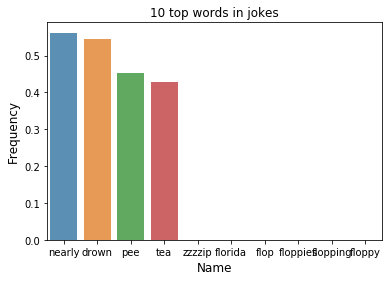

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
TfIdf=TfidfVectorizer()
DataTransform=TfIdf.fit_transform(data['Answer'])
#row = data['Answer']                                   #Just tried to get a graph for a top 10 words in the dataset

#tfidf_matrix2=DataTransform.getrow(row)
array_data = pd.Series(DataToArray[0,:],index = Feature_names).sort_values(ascending=False)
sns.barplot(array_data[:10].index, array_data[:10].values, alpha=0.8)
plt.title('10 top words in jokes')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.show()

# LSA 

In [ ]:
from scipy.linalg import svd
u,s,v=svd(DataTransform.todense(),full_matrices=False)

In [ ]:
rank=2
uk=u[:,0:rank]
sk=np.diag(s)[0:rank,0:rank]
vk=v[0:rank,:]

In [ ]:
aa=np.argsort(vk,axis=1)[::-1]
for t in range(rank):
    print('------ topic number'+str(t)+'--------')
    for i in range(10):
        print(Tfidf.get_feature_names()[aa[t,i]])

In [43]:
from sklearn.decomposition import TruncatedSVD
LSA=TruncatedSVD(n_components=3,n_iter=100)

In [44]:
LSA.fit(DataTransform)

TruncatedSVD(algorithm='randomized', n_components=3, n_iter=100,
       random_state=None, tol=0.0)

In [45]:
for i,comp in enumerate(LSA.components_):
    print("------------------------")
    termsIncomp=zip(Feature_names,comp)
    sorted_names=sorted(termsIncomp,key=lambda x: x[1],reverse=True)[:10]
    print("Concept %d:" %i)
    for terms in sorted_names:
        print(terms[0])
    

------------------------
Concept 0:
the
because
it
they
to
you
he
in
was
of
------------------------
Concept 1:
because
he
they
was
it
re
had
always
can
even
------------------------
Concept 2:
he
was
it
the
his
in
had
is
out
she
